## Coast Train metadata plots: geographic distribution

Daniel Buscombe, Marda Science contracted to U.S Geological Survey Pacific Coastal and Marine Science Center

January, 2022


These plots describe the Coast Train "v1" dataset


To install cartopy (for simple map making), uncomment below

In [3]:
# ! conda install cartopy -y

Import libraries

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

Read data

In [5]:
A = pd.read_csv('../metadata/A_naip_meta_served.csv')
B = pd.read_csv('../metadata/B_quads_gulf_meta_served.csv')
C = pd.read_csv('../metadata/C_s2_meta_served.csv')
D = pd.read_csv('../metadata/D_s2_4classes_meta_served.csv')
E = pd.read_csv('../metadata/E_L8_meta_all_served.csv')
F = pd.read_csv('../metadata/F_elwha_l8_served.csv')
G = pd.read_csv('../metadata/G_madeira_meta_served.csv')
H = pd.read_csv('../metadata/H_dauphin_meta_served.csv')
I = pd.read_csv('../metadata/I_sandwich_metadata_served.csv')
J = pd.read_csv('../metadata/J_naip_6class_meta_served.csv')

Define a list of dataset names

In [6]:
names = [
    'A: NAIP',
    'B: Quads',
    'C: S2',
    'D: S2-4class',
    'E: Landsat-8',
    'F: Landsat-8-Elwha',
    'G: Madeira',
    'H: Dauphin',
    'I: Sandwich',
    'J: NAIP-6class'
]

get all latitude and longitude values and stash into lists

In [7]:
lons = []
lats = []
for counter,(dat,name) in enumerate(zip([A,B,C,D,E,F,G,H,I,J], names)):
    lons.append(dat['LonMin'])
    lats.append(dat['LatMin'])

lats = np.hstack(lats)
lons = np.hstack(lons)

Plot number of images by latitude and longitude

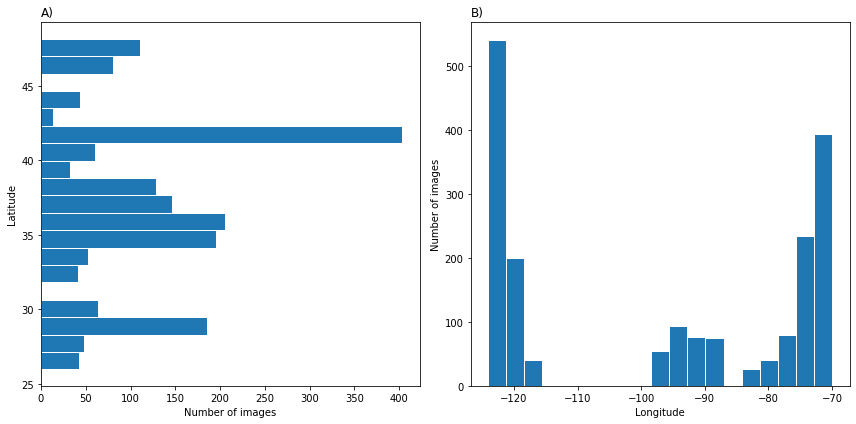

In [9]:
plt.rcParams["figure.autolayout"] = True

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.hist(lats, bins=np.linspace(np.min(lats), np.max(lats), 20), orientation="horizontal", edgecolor='white', linewidth=1)
plt.xlabel('Number of images')
plt.ylabel('Latitude')
plt.title('A)', loc='left')

plt.subplot(122)
plt.hist(lons, bins=np.linspace(np.min(lons), np.max(lons), 20), edgecolor='white', linewidth=1)
plt.ylabel('Number of images')
plt.xlabel('Longitude')
plt.title('B)', loc='left')

plt.savefig('../plots/All_imagery_by_lat_and_lon.png',dpi=200, bbox_inches='tight')    
plt.close('all')   

Plot map of satellite image locations

/home/marda/anaconda3/envs/coastsat/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


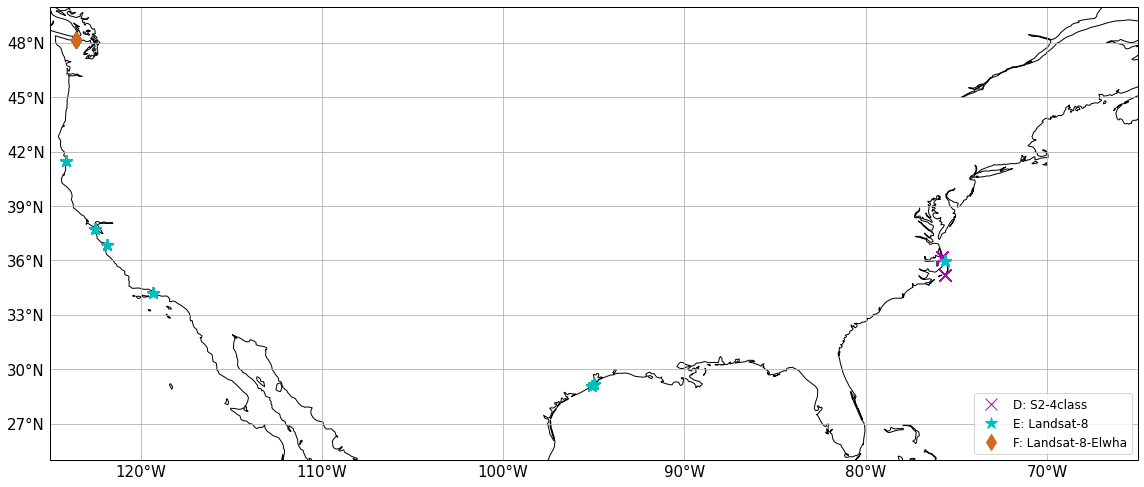

In [40]:
crs = ccrs.PlateCarree()

plt.figure(figsize=(16,16))

ax = plt.axes(projection=crs)
ax.set_extent([-125, -65, 25, 50], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')

# Put a background image on for nice sea rendering.
# ax.stock_img()

gl = ax.gridlines(draw_labels=True)

gl.xlabels_top = False
gl.ylabels_right = False
# gl.xlines = False

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylabel_style = {'size': 15, 'color': 'black'}

plt.plot(D['LonMin'],D['LatMin'],'mx', label=names[3], markersize=12)
plt.plot(E['LonMin'],E['LatMin'],'c*', label=names[4], markersize=12)
plt.plot(F['LonMin'],F['LatMin'],'d', color='chocolate', label=names[5], markersize=12)

plt.legend(loc=4, fontsize=12)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# plt.tight_layout(rect=[0, 0.03, 1, 0.95]))
plt.savefig('../plots/Map_satellite_imagery.png',dpi=200, bbox_inches='tight')    
plt.close('all')   

Plot map of orthomosaic image locations

/home/marda/anaconda3/envs/coastsat/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


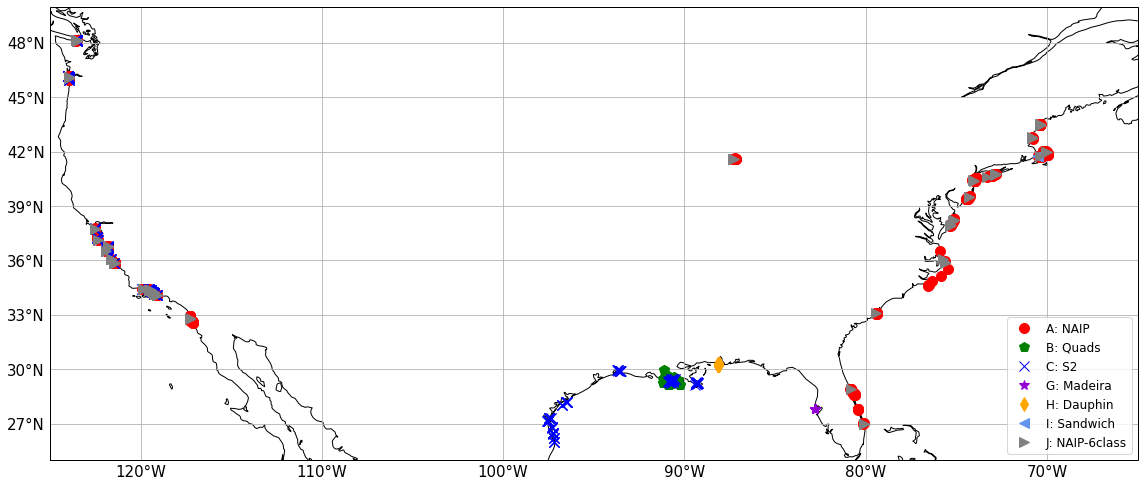

In [37]:
crs = ccrs.PlateCarree()

plt.figure(figsize=(16,16))
ax = plt.axes(projection=crs)
ax.set_extent([-125, -65, 25, 50], crs=ccrs.PlateCarree())
dat = ax.coastlines(resolution='50m')
gl = ax.gridlines(draw_labels=True)

gl.xlabels_top = False
gl.ylabels_right = False
# gl.xlines = False

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylabel_style = {'size': 15, 'color': 'black'}

plt.plot(A['LonMin'],A['LatMin'],'ro', label=names[0], markersize=10)
plt.plot(B['LonMin'],B['LatMin'],'gp', label=names[1], markersize=10)
plt.plot(C['LonMin'],C['LatMin'],'bx', label=names[2], markersize=10)
plt.plot(G['LonMin'],G['LatMin'],'*', color='darkviolet', label=names[6], markersize=10)
plt.plot(H['LonMin'],H['LatMin'],'d', color='orange', label=names[7], markersize=10)
plt.plot(I['LonMin'],I['LatMin'],'<', color='cornflowerblue', label=names[8], markersize=10)
plt.plot(J['LonMin'],J['LatMin'],'>', color='grey', label=names[9], markersize=10)

# plt.xlabel('Longitude')
# plt.ylabel('Latitude')

# ax.set_xlabel('Longitude', fontsize=12)
plt.legend(loc=4, fontsize=12)

plt.savefig('../plots/Map_orthomosaic_imagery.png',dpi=200, bbox_inches='tight')    
plt.close('all')   

make a heatmap in space using hexagon binning

/home/marda/anaconda3/envs/coastsat/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


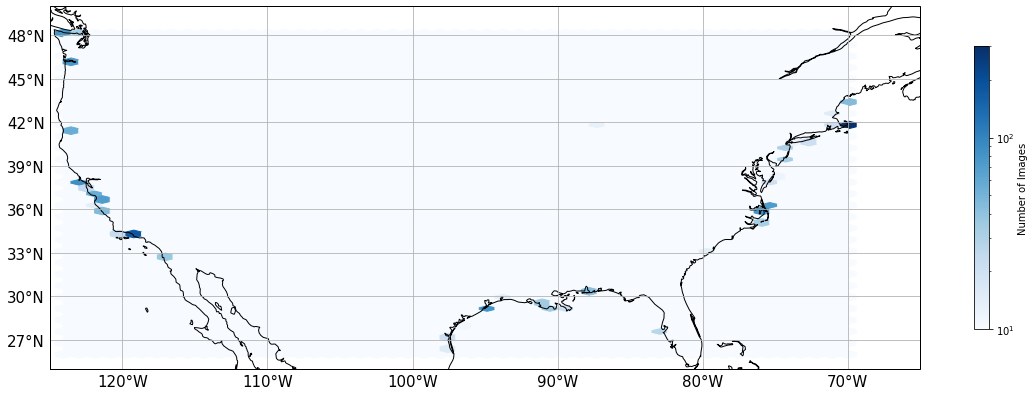

In [53]:
crs = ccrs.PlateCarree()

plt.figure(figsize=(16,16))
ax = plt.axes(projection=crs)
plt.hexbin(lons, lats, gridsize=50, bins='log',cmap='Blues', vmin=10, vmax=300)
ax.set_extent([-125, -65, 25, 50], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='k')
gl = ax.gridlines(draw_labels=True)

gl.xlabels_top = False
gl.ylabels_right = False
# gl.xlines = False

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylabel_style = {'size': 15, 'color': 'black'}

cbar=plt.colorbar(shrink=0.25)
cbar.set_label('Number of Images')
plt.savefig('../plots/Heatmap_all_imagery.png',dpi=200, bbox_inches='tight')    
plt.close('all')   

uncomment below if you have imagemagick program montage (on linux) and want to merge the 3 figures above

In [54]:
# ! montage Map_orthomosaic_imagery.png Map_satellite_imagery.png Heatmap_all_imagery.png -geometry 2618x1157+20+20 -tile 1x3 Merged_maps.png